In [5]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from random import normalvariate
from itertools import product
from tqdm import tqdm

plt.rc(
    "text.latex",
    preamble=r"""
\usepackage{amsfonts}
\usepackage{amsmath}
\usepackage{mathtools}
\newcommand{\avg}[1]{\mathopen{}\left\langle #1 \right\rangle\mathclose{}}
\newcommand{\p}[1]{\mathopen{}\left\lparen #1 \right\rparen\mathclose{}}
\newcommand{\conj}[1]{\overline{#1}}
\newcommand{\G}{\widetilde{G}}
\newcommand{\m}{\mathbf{m}}
\newcommand{\E}{\mathbb{E}}
""",
)

In [6]:
# Parameters

N = 50
eta = N ** (-0.5)

In [7]:
# Model specification


Lambda = np.block(
    [
        [np.zeros((N, N)), complex(0, 1) * np.eye(N)],
        [complex(0, -1) * np.eye(N), np.zeros((N, N))],
    ]
)


def GOE():
    return np.matrix(
        [
            [complex(normalvariate(0, 0.5), normalvariate(0, 0.5)) for _ in range(N)]
            for _ in range(N)
        ]
    ) / np.sqrt(N)


def H():
    return (
        np.block(
            [
                [GOE(), np.zeros((N, N), dtype=complex)],
                [np.zeros((N, N), dtype=complex), GOE()],
            ]
        )
        + Lambda
    )


Lambda.shape

(100, 100)

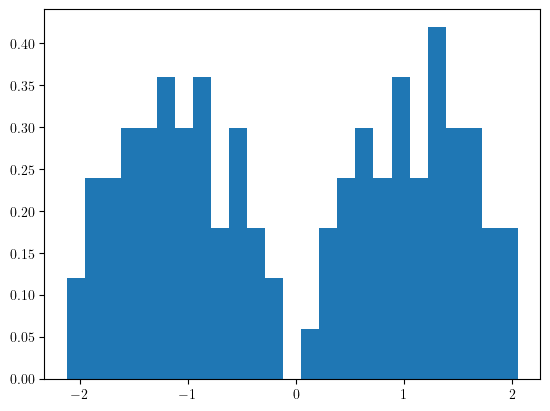

In [26]:
eig = np.linalg.eigvalsh(H())
plt.hist(eig, density=True, bins=25)
plt.show()

In [27]:
# # Numerical solution to matrix Dyson equation (too slow)


# def Pi(z: complex, M: np.ndarray):
#     return np.eye(2 * N) + z * M + (np.trace(M) / (2 * N)) * M - Lambda @ M


# def complex_flatten(a: np.ndarray):
#     return np.array([np.real(a), np.imag(a)]).flatten()


# def complex_unflatten(a: np.ndarray):
#     b = a.reshape((2, 2 * N, 2 * N))
#     return b[0] + complex(0, 1) * b[1]


# def numerical_mde_at(z: complex):
#     def f(flattened_M: np.ndarray):
#         M = complex_unflatten(flattened_M)
#         return complex_flatten(Pi(z, M))

#     return f


# E_range = np.arange(-3, 3, 0.01)
# M_range = []

# M_0 = complex(0, 0.1) * np.eye(2 * N)
# for E in tqdm(E_range):
#     z = complex(E, eta)
#     sol = root(numerical_mde_at(z), complex_flatten(M_0), method="krylov")
#     flattened_M = sol.x
#     if not sol.success:
#         print(sol.message)
#     M_range.append(complex_unflatten(flattened_M))

# E = E_range
# M = np.array(M_range)

# M.shape

In [ ]:
# Numerical 

E_range = np.arange(-3, 3, 0.01)
M_range = []

M_0 = complex(0, 0.1) * np.eye(2 * N)
for E in tqdm(E_range):
    z = complex(E, eta)
    sol = root(numerical_mde_at(z), complex_flatten(M_0), method="krylov")
    flattened_M = sol.x
    if not sol.success:
        print(sol.message)
    M_range.append(complex_unflatten(flattened_M))

E = E_range
M = np.array(M_range)

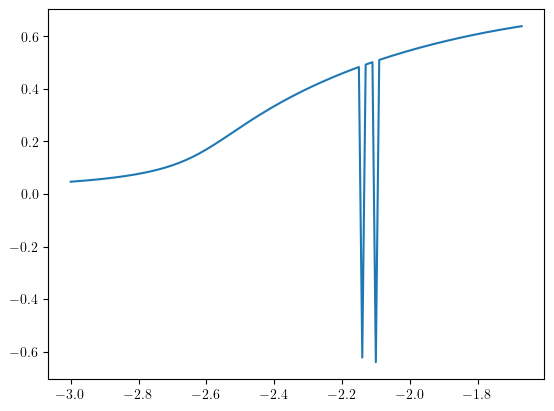

In [16]:
m = np.trace(M, axis1=-2, axis2=-1) / (2 * N)
plt.plot(E[:134], np.imag(m))
plt.show()